In [2]:
data = [(2, 96684422), (4, 96767781), (6, 96760818), (8, 96694682), (10, 96684321), (12, 96809939), (14, 96835986), (16, 96711760), (18, 96763567), (20, 96684234), (22, 96764812), (24, 92767258), (26, 92713812), (28, 92706904), (30, 92784080), (32, 92685222), (48, 92747737), (64, 92632542), (128, 64873490), (256, 38206225), (512, 21131384), (1024, 11531901)]

[250000000.0, 240384615.3846154, 231481481.4814815, 223214285.7142857, 215517241.37931034, 208333333.33333334, 201612903.22580644, 195312500.0, 189393939.3939394, 183823529.4117647, 178571428.57142857, 173611111.1111111, 168918918.9189189, 164473684.21052632, 160256410.25641027, 156250000.0, 130208333.33333333, 111607142.85714285, 71022727.27272727, 41118421.05263158, 22321428.57142857, 11660447.76119403]


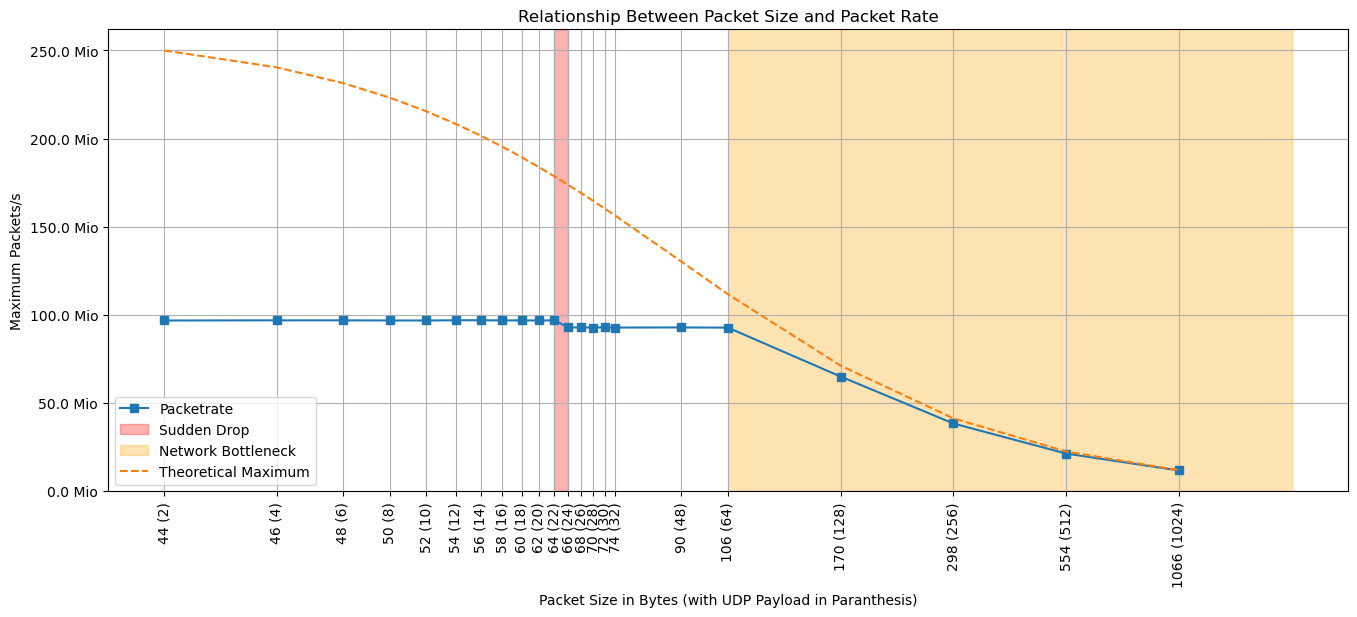

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

p_size = []
pps = []

def million_formatter(x, pos):
    return f'{x/1_000_000:.1f} Mio'


for m in data:
    p_size.append(m[0])
    pps.append(m[1])

theoretical = [(100_000_000_000/8)/(ps+48) for ps in p_size[0:]]
print(theoretical)

plt.figure(figsize=(16, 6))
plt.plot(p_size, pps, "-s", label="Packetrate")
plt.title("Relationship Between Packet Size and Packet Rate")
plt.xlabel("Packet Size in Bytes (with UDP Payload in Paranthesis)")
plt.ylabel("Maximum Packets/s")
plt.xscale('log', base=2)
plt.xticks(p_size, [f"{str(val+42)} ({str(val)})" for val in p_size], rotation=90)
#plt.yticks(pps, [str(val) for val in pps])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 9))
#plt.gca().yaxis.set_major_formatter(formatter)
#plt.ticklabel_format(axis='y', style='sci')

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.axvspan(22, 24, color='red', alpha=0.3, label='Sudden Drop')
plt.axvspan(64, 2048, color='orange', alpha=0.3, label='Network Bottleneck')
#plt.autoscale(False)
plt.plot(p_size[0:], theoretical, "--", label="Theoretical Maximum")

plt.legend()
plt.grid(True)

plt.show()

#TODO: kann Flow keine Jumboframes?

[12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0]


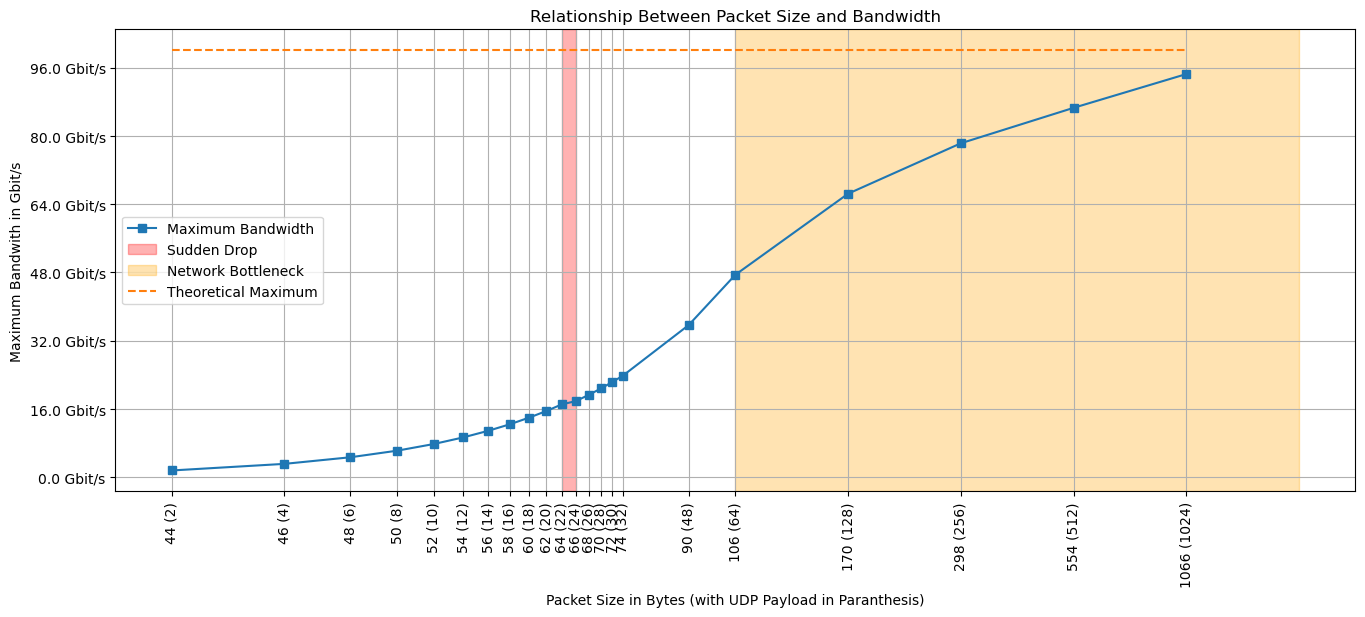

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

p_size = []
pps = []

def million_formatter(x, pos):
    return f'{x*8/1_000_000_000:.1f} Gbit/s'


for m in data:
    p_size.append(m[0])
    pps.append(int(m[1])*int(m[0]))

theoretical = [(100_000_000_000/8) for ps in p_size[0:]]
print(theoretical)

plt.figure(figsize=(16, 6))
plt.plot(p_size, pps, "-s", label="Maximum Bandwidth")
plt.title("Relationship Between Packet Size and Bandwidth")
plt.xlabel("Packet Size in Bytes (with UDP Payload in Paranthesis)")
plt.ylabel("Maximum Bandwith in Gbit/s")
plt.xscale('log', base=2)
plt.xticks(p_size, [f"{str(val+42)} ({str(val)})" for val in p_size], rotation=90)
#plt.yticks(pps, [str(val) for val in pps])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 9))
#plt.gca().yaxis.set_major_formatter(formatter)
#plt.ticklabel_format(axis='y', style='sci')

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.axvspan(22, 24, color='red', alpha=0.3, label='Sudden Drop')
plt.axvspan(64, 2048, color='orange', alpha=0.3, label='Network Bottleneck')
#plt.autoscale(False)
plt.plot(p_size[0:], theoretical, "--", label="Theoretical Maximum")

plt.legend()
plt.grid(True)
plt.savefig("pps.svg")
plt.show()
